# 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!
##### !. VScode 플랫폼을 사용하여 가상환경 Python 3.9.7버전에서 작성되었습니다.


### (1) 데이터 가져오기
sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.  
diabetes의 data를 df_X에, target을 df_y에 저장해주세요.  

In [108]:
import numpy as np
import pandas as pd
import sklearn
print(np.__version__) # numpy version 1.22.3
print(pd.__version__) # pands version 1.4.2
print(sklearn.__version__) # sklearn version 1.0.2

1.22.3
1.4.2
1.0.2


In [110]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error #mse 모듈을 사용하기 위해 불러옴
import matplotlib.pyplot as plt #그래프 기능을 사용하기 위해 불러옴 (8번용)

In [3]:
diabetes = load_diabetes()

print(dir(diabetes))

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']


In [4]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [6]:
df_X = diabetes.data
print(df_X.shape) # 442 10
print(type(df_X)) # numpy.ndarray
df_X[0]

(442, 10)
<class 'numpy.ndarray'>


array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [7]:
df_y = diabetes.target
print(df_y.shape)
df_y

(442,)


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [8]:
#diabetes.target_filename # diabetes_target.csv.gz
#diabetes.feature_names #['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [9]:
diabetes_df =pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df #442rows x 10 columns

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [10]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [11]:
diabetes_df["label"] = diabetes.target
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


### (2) 모델에 입력할 데이터 x 준비하기
df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [12]:
X = np.array(df_X)

### (3) 모델에 예측할 데이터 y 준비하기
df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.


In [13]:
y = np.array(df_y)

### (4) train 데이터와 test 데이터로 분리하기
X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state 42가 train테스트와 test 데이터 결과성능이 유사하게 나옴.
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# 10개의 정보(feature)가 있는 데이터

(353, 10) (353,)
(89, 10) (89,)


### (5) 모델 준비하기
입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.  
모델 함수를 구현해주세요.

In [106]:
#numpy 필요
W = np.random.rand(10)# 10개
b = np.random.rand() # 1개

In [79]:
W

array([0.33857622, 0.21211308, 0.07906105, 0.16901643, 0.75043382,
       0.65000693, 0.44607038, 0.04582096, 0.27136912, 0.79728454])

In [80]:
b

0.8725643462585487

In [81]:
#모델함수 구현
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions


### (6) 손실함수 loss 정의하기
손실함수를 MSE 함수로 정의해주세요.


In [85]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [86]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

### (7) 기울기를 구하는 gradient 함수 구현하기
기울기를 계산하는 gradient 함수를 구현해주세요.


In [89]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)

    # y_pred 준비
    y_pred = model(X, W, b)

    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)

    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
    

In [90]:
# gradient 계산
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

'''
dW: [ -60.53317007  -13.7179316  -189.63390588 -142.56862429  -68.30374602
  -56.05098535  127.68260888 -139.05192987 -182.86590269 -123.47677324]
db: -302.73555424399063
'''

dW: [ -60.62176054  -13.84495687 -189.71289976 -142.74479549  -68.26350264
  -56.00890414  127.79540428 -139.12296464 -182.9654649  -123.54521277]
db: -302.52183963327474


'\ndW: [ -60.53317007  -13.7179316  -189.63390588 -142.56862429  -68.30374602\n  -56.05098535  127.68260888 -139.05192987 -182.86590269 -123.47677324]\ndb: -302.73555424399063\n'

### (8) 하이퍼 파라미터인 학습률 설정하기
학습률, learning rate 를 설정해주세요  
만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.


In [91]:
# 학습률 0.001
LEARNNING_RATE = 0.001

### (9) 모델 학습하기
정의된 손실함수와 기울기 함수로 모델을 학습해주세요.  
loss값이 충분히 떨어질 때까지 학습을 진행해주세요.  
입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.  

In [105]:
losses = []
# 반복횟수가 높아질수록 손실함수의 값이 낮아지지만 시스템자원을 적절하게 활용하기 위해 학습률과 반복횟수의 적절한 제한을 줌.
for i in range(1, 20001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNNING_RATE * dW
    b -= LEARNNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 2898.3420
Iteration 20 : Loss 2898.3394
Iteration 30 : Loss 2898.3369
Iteration 40 : Loss 2898.3343
Iteration 50 : Loss 2898.3317
Iteration 60 : Loss 2898.3291
Iteration 70 : Loss 2898.3265
Iteration 80 : Loss 2898.3240
Iteration 90 : Loss 2898.3214
Iteration 100 : Loss 2898.3188
Iteration 110 : Loss 2898.3163
Iteration 120 : Loss 2898.3137
Iteration 130 : Loss 2898.3112
Iteration 140 : Loss 2898.3086
Iteration 150 : Loss 2898.3061
Iteration 160 : Loss 2898.3036
Iteration 170 : Loss 2898.3010
Iteration 180 : Loss 2898.2985
Iteration 190 : Loss 2898.2960
Iteration 200 : Loss 2898.2934
Iteration 210 : Loss 2898.2909
Iteration 220 : Loss 2898.2884
Iteration 230 : Loss 2898.2859
Iteration 240 : Loss 2898.2834
Iteration 250 : Loss 2898.2809
Iteration 260 : Loss 2898.2784
Iteration 270 : Loss 2898.2759
Iteration 280 : Loss 2898.2734
Iteration 290 : Loss 2898.2709
Iteration 300 : Loss 2898.2684
Iteration 310 : Loss 2898.2659
Iteration 320 : Loss 2898.2634
Iteration 330 : L

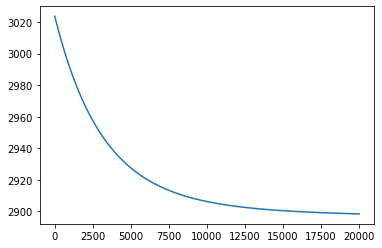

In [102]:
# plt는 matplotlib.pyplot에 단축어 그래프를 사용하기 위해 선언
plt.plot(losses)
plt.show()



In [103]:
W, b

(array([  39.97077718, -235.82706304,  549.09387641,  339.65086538,
         -96.16203644, -127.78992617, -216.67767471,  148.04117921,
         409.29268155,   74.21579372]),
 151.30461061349337)

### (10) test 데이터에 대한 성능 확인하기
test 데이터에 대한 성능을 확인해주세요.

In [104]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse #2879.6168385462097



2879.6168385462097

### (11) 정답 데이터와 예측한 데이터 시각화하기
x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

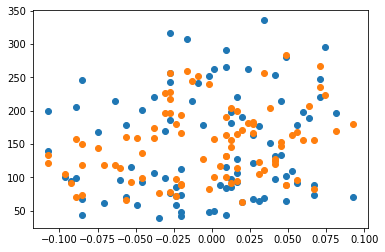

In [34]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

### 회고록:

LinearRegression을 사용하여 분석을 위해 필요한 데이터들을 전처리 해보고 이를 통해 미래를 예측해보는 두번째 Explation이었다.  
수학적인 개념을 적용시킨다는 것 자체가 생소하게 느껴져 코드 작성 초기에는 막막함이 앞섰다.  
LMS에서 기능과 코드들을 친절하게 설명해주었기에 코드작성자체는 어렵지 않았지만, 코드를 실행 후 학습률과 테스트 데이터의 결과물들에서 적절한 값을 뽑아내는 기준을 선정하기 어려웠다.   
특히 초반에 학습률을 최대한 작게 잡았을 때는 MSE 손실함수 값이 2만까지 넘어가 놀라기도 했었다.  
이를 보완하기 계속해서 random_state등을 Learning_rate나 반복횟수등을 변경해보는 둥의 노력이 필요했다.   
다행히도 반복하던 와중 프로젝트가 요구하는 정확도를 뽑아낼 수 있었다.  
자전거 대여량을 예측하는 두번째 프로젝트는 시간을 분리하여 새로운 컬럼을 생성하는 부분에서부터 어려움이 느껴졌다.   
다행히도 datetime을 사용해하여 분리하는 방법에 관한 링크가 있어 여러번 코드를 쓰고 지우고를 반복해 원하는 결과를 뽑아낼 수 있었다.  
그래프를 만드는 과정에서도 subplot을 이용하여 데이터개수를 표현하고자 했을 때 어떻게 만들어야 할지 감이 잡히지 않아서 어려웠었다.  

추가적으로 linear 학습률과 loss함수에 대해 처음에는 어려웠지만 아이펠 진행중 노드와 풀잎스쿨에서 관련 개념들을 발표해보면서 이해할 수 있는 시간이 있어서 코드를 작성하는데 큰 도움이 되었다.   
배운 지식들을 연결해보는 과정이 중요함을 다시 한번 깨달았다.  

저번시간에 이어서 pandas와 numpy의 기능을 활용하고 있다. 이 부분은 지속적으로 study가 필요.  

### Reference

cs231 - https://cs231n.github.io/python-numpy-tutorial/  
khan academy - https://ko.khanacademy.org/math/linear-algebra  
인공지능을 위한 선형대수 - https://www.edwith.org/ai251/joinLectures/195088  